Training model with 1 components, trial 0


100%|██████████| 500/500 [00:01<00:00, 402.00it/s, loss=3.64]


Training model with 1 components, trial 1


100%|██████████| 500/500 [00:01<00:00, 255.01it/s, loss=3.65]


Training model with 1 components, trial 2


100%|██████████| 500/500 [00:01<00:00, 402.46it/s, loss=3.68]


Training model with 1 components, trial 3


100%|██████████| 500/500 [00:01<00:00, 434.42it/s, loss=3.64]


Training model with 1 components, trial 4


100%|██████████| 500/500 [00:00<00:00, 565.20it/s, loss=3.64]


Training model with 2 components, trial 0


100%|██████████| 500/500 [00:01<00:00, 332.24it/s, loss=3.38]


Training model with 2 components, trial 1


100%|██████████| 500/500 [00:01<00:00, 343.17it/s, loss=3.3] 


Training model with 2 components, trial 2


100%|██████████| 500/500 [00:01<00:00, 364.76it/s, loss=3.38]


Training model with 2 components, trial 3


100%|██████████| 500/500 [00:01<00:00, 409.82it/s, loss=3.36]


Training model with 2 components, trial 4


100%|██████████| 500/500 [00:02<00:00, 221.13it/s, loss=3.38]


Training model with 4 components, trial 0


100%|██████████| 500/500 [00:02<00:00, 235.72it/s, loss=2.55]


Training model with 4 components, trial 1


100%|██████████| 500/500 [00:02<00:00, 214.43it/s, loss=2.55]


Training model with 4 components, trial 2


100%|██████████| 500/500 [00:01<00:00, 251.32it/s, loss=2.87]


Training model with 4 components, trial 3


100%|██████████| 500/500 [00:01<00:00, 254.12it/s, loss=3.14]


Training model with 4 components, trial 4


100%|██████████| 500/500 [00:02<00:00, 178.07it/s, loss=2.55]


Training model with 8 components, trial 0


100%|██████████| 500/500 [00:03<00:00, 158.61it/s, loss=2.26]


Training model with 8 components, trial 1


100%|██████████| 500/500 [00:03<00:00, 158.90it/s, loss=2.12]


Training model with 8 components, trial 2


100%|██████████| 500/500 [00:04<00:00, 121.58it/s, loss=2.37]


Training model with 8 components, trial 3


100%|██████████| 500/500 [00:03<00:00, 164.90it/s, loss=2.54]


Training model with 8 components, trial 4


100%|██████████| 500/500 [00:02<00:00, 167.74it/s, loss=2.12]


Training model with 16 components, trial 0


100%|██████████| 500/500 [00:05<00:00, 85.15it/s, loss=2.02] 


Training model with 16 components, trial 1


100%|██████████| 500/500 [00:05<00:00, 98.46it/s, loss=2.06] 


Training model with 16 components, trial 2


100%|██████████| 500/500 [00:06<00:00, 79.96it/s, loss=2.08]


Training model with 16 components, trial 3


100%|██████████| 500/500 [00:05<00:00, 94.40it/s, loss=2.01]


Training model with 16 components, trial 4


100%|██████████| 500/500 [00:05<00:00, 86.23it/s, loss=2.07] 


Training model with 32 components, trial 0


100%|██████████| 500/500 [00:10<00:00, 47.71it/s, loss=1.95]


Training model with 32 components, trial 1


100%|██████████| 500/500 [00:10<00:00, 48.14it/s, loss=2]   


Training model with 32 components, trial 2


100%|██████████| 500/500 [00:10<00:00, 49.82it/s, loss=1.96]


Training model with 32 components, trial 3


100%|██████████| 500/500 [00:09<00:00, 53.22it/s, loss=1.97]


Training model with 32 components, trial 4


100%|██████████| 500/500 [00:10<00:00, 49.42it/s, loss=2]   


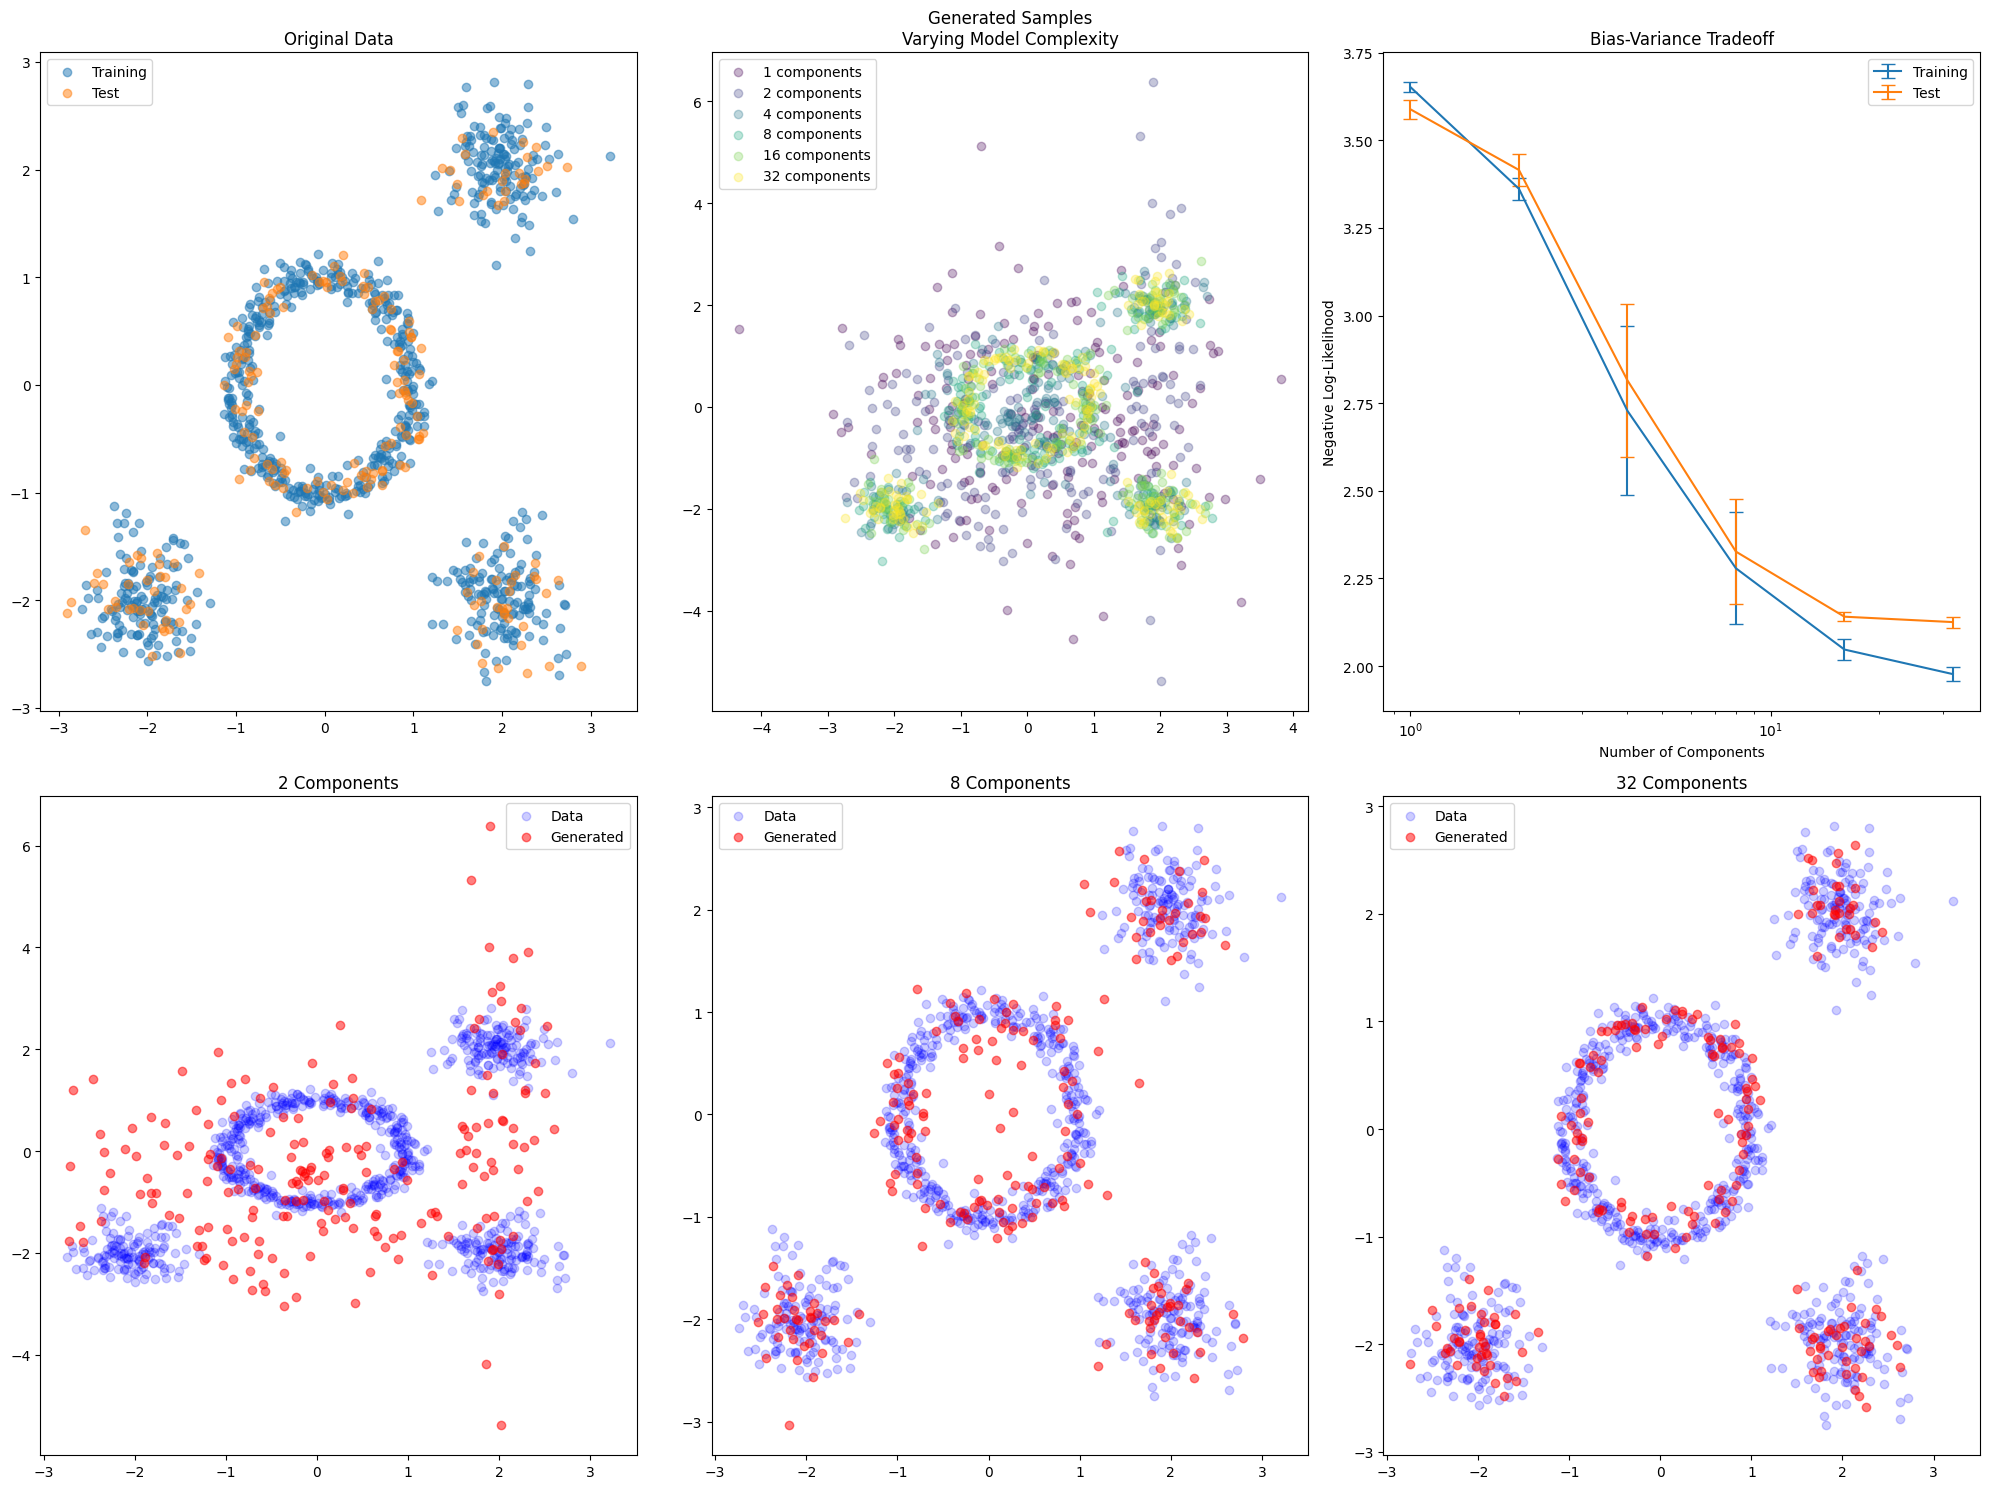


Number of Components: 1
Training - Mean: 3.65, Std: 0.01
Test     - Mean: 3.59, Std: 0.03
Generalization Gap: -0.06

Number of Components: 2
Training - Mean: 3.36, Std: 0.03
Test     - Mean: 3.42, Std: 0.05
Generalization Gap: 0.05

Number of Components: 4
Training - Mean: 2.73, Std: 0.24
Test     - Mean: 2.82, Std: 0.22
Generalization Gap: 0.09

Number of Components: 8
Training - Mean: 2.28, Std: 0.16
Test     - Mean: 2.33, Std: 0.15
Generalization Gap: 0.05

Number of Components: 16
Training - Mean: 2.05, Std: 0.03
Test     - Mean: 2.14, Std: 0.01
Generalization Gap: 0.09

Number of Components: 32
Training - Mean: 1.98, Std: 0.02
Test     - Mean: 2.13, Std: 0.02
Generalization Gap: 0.15


In [3]:
import torch
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.distributions.multivariate_normal import MultivariateNormal
import seaborn as sns

# TODO: use swiss roll data

class GaussianMixture(torch.nn.Module):
    def __init__(self, n_components, n_dimensions=2):
        super().__init__()
        self.n_components = n_components
        self.means = torch.nn.Parameter(torch.randn(n_components, n_dimensions))
        self.log_vars = torch.nn.Parameter(torch.zeros(n_components, n_dimensions))
        self.mixing_logits = torch.nn.Parameter(torch.zeros(n_components))
    
    def get_distributions(self):
        vars = torch.exp(self.log_vars)
        covs = torch.stack([torch.diag(var) for var in vars])
        components = [MultivariateNormal(mean, cov) for mean, cov in zip(self.means, covs)]
        mixing_coeffs = torch.softmax(self.mixing_logits, dim=0)
        return components, mixing_coeffs
    
    def log_likelihood(self, X):
        components, mixing_coeffs = self.get_distributions()
        component_likelihoods = torch.stack([comp.log_prob(X) for comp in components])
        logits = component_likelihoods + torch.log(mixing_coeffs.unsqueeze(1))
        return torch.logsumexp(logits, dim=0).mean()
    
    def sample(self, n_samples):
        components, mixing_coeffs = self.get_distributions()
        # Sample component indices
        z = torch.multinomial(mixing_coeffs, n_samples, replacement=True)
        # Sample from selected components
        samples = torch.stack([components[i].sample() for i in z])
        return samples

def generate_complex_data(n_samples, noise_level=0.1):
    """Generate data from a complex distribution (mixture of 3 Gaussians + sine wave)"""
    # Generate points along a sine wave
    t = torch.linspace(0, 4*np.pi, n_samples//2)
    x1 = t.cos()
    x2 = t.sin()
    X_sine = torch.stack([x1, x2], dim=1)
    
    # Add Gaussian clusters
    centers = torch.tensor([[2.0, 2.0], [-2.0, -2.0], [2.0, -2.0]])
    X_clusters = torch.cat([
        torch.randn(n_samples//6, 2) * 0.3 + center 
        for center in centers
    ])
    
    # Combine and add noise
    X = torch.cat([X_sine, X_clusters])
    X = X + torch.randn_like(X) * noise_level
    
    return X

def train_model(model, X_train, n_epochs=500, lr=0.01):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    losses = []
    
    pbar = tqdm(range(n_epochs))
    for epoch in pbar:
        optimizer.zero_grad()
        loss = -model.log_likelihood(X_train)
        pbar.set_postfix(loss=loss.item())
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    
    return losses

def evaluate_bias_variance(n_components_list, n_trials=5):
    # Generate dataset
    X = generate_complex_data(1000)
    X_train, X_test = train_test_split(X, test_size=0.2)
    X_train = torch.FloatTensor(X_train)
    X_test = torch.FloatTensor(X_test)
    
    results = {
        'train_losses': [],
        'test_losses': [],
        'predictions': [],
        'components': []
    }
    
    for n_components in n_components_list:
        trial_trains, trial_tests = [], []
        trial_preds = []
        
        for trial in range(n_trials):
            # Train model
            print(f"Training model with {n_components} components, trial {trial}")
            model = GaussianMixture(n_components=n_components)
            train_losses = train_model(model, X_train)
            
            # Evaluate
            with torch.no_grad():
                train_loss = -model.log_likelihood(X_train)
                test_loss = -model.log_likelihood(X_test)
                predictions = model.sample(200)
            
            trial_trains.append(train_loss.item())
            trial_tests.append(test_loss.item())
            trial_preds.append(predictions)
        
        results['train_losses'].append(trial_trains)
        results['test_losses'].append(trial_tests)
        results['predictions'].append(trial_preds)
        results['components'].append(n_components)
    
    return results, X_train, X_test

# Run experiment
n_components_list = [1, 2, 4, 8, 16, 32]
results, X_train, X_test = evaluate_bias_variance(n_components_list)

# Plotting
plt.figure(figsize=(20, 15))

# Plot 1: Original Data
plt.subplot(231)
plt.scatter(X_train[:, 0], X_train[:, 1], alpha=0.5, label='Training')
plt.scatter(X_test[:, 0], X_test[:, 1], alpha=0.5, label='Test')
plt.title('Original Data')
plt.legend()

# Plot 2: Model Predictions for Different Complexities
plt.subplot(232)
colors = plt.cm.viridis(np.linspace(0, 1, len(n_components_list)))
for i, n_comp in enumerate(n_components_list):
    predictions = results['predictions'][i][0]  # First trial
    plt.scatter(predictions[:, 0], predictions[:, 1], 
                alpha=0.3, color=colors[i], 
                label=f'{n_comp} components')
plt.title('Generated Samples\nVarying Model Complexity')
plt.legend()

# Plot 3: Bias-Variance Analysis
plt.subplot(233)
train_means = np.mean(results['train_losses'], axis=1)
train_stds = np.std(results['train_losses'], axis=1)
test_means = np.mean(results['test_losses'], axis=1)
test_stds = np.std(results['test_losses'], axis=1)

plt.errorbar(n_components_list, train_means, yerr=train_stds, 
             label='Training', capsize=5)
plt.errorbar(n_components_list, test_means, yerr=test_stds, 
             label='Test', capsize=5)
plt.xlabel('Number of Components')
plt.ylabel('Negative Log-Likelihood')
plt.title('Bias-Variance Tradeoff')
plt.legend()
plt.xscale('log')

# Plot 4-6: Individual Component Visualizations
for idx, n_comp in enumerate([2, 8, 32]):
    plt.subplot(234 + idx)
    predictions = results['predictions'][n_components_list.index(n_comp)][0]
    plt.scatter(X_train[:, 0], X_train[:, 1], alpha=0.2, color='blue', label='Data')
    plt.scatter(predictions[:, 0], predictions[:, 1], 
                alpha=0.5, color='red', label='Generated')
    plt.title(f'{n_comp} Components')
    plt.legend()

plt.tight_layout()
plt.show()

# Print analysis
for i, n_comp in enumerate(n_components_list):
    train_mean = np.mean(results['train_losses'][i])
    train_std = np.std(results['train_losses'][i])
    test_mean = np.mean(results['test_losses'][i])
    test_std = np.std(results['test_losses'][i])
    
    print(f"\nNumber of Components: {n_comp}")
    print(f"Training - Mean: {train_mean:.2f}, Std: {train_std:.2f}")
    print(f"Test     - Mean: {test_mean:.2f}, Std: {test_std:.2f}")
    print(f"Generalization Gap: {test_mean - train_mean:.2f}")